In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the data

In [22]:
df=pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship',skiprows=20,skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


# Preprocessing of data according to need

In [23]:
print(df.columns.tolist())

['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


In [24]:
df.rename({
    'OdName':'country',
    'AreaName':'continent',
    'RegName':'region',
    'DevName':'country_status'
},axis=1,inplace=True)

- check the count of values in a categorical cols and drop if count is 1

In [25]:
df['Type'].value_counts()# count the no. of each unique value in the columns

Immigrants    195
Name: Type, dtype: int64

- drops the cols which are not required 

In [26]:
cols_to_drop=['Type','Coverage','AREA','REG','DEV']
df.drop(columns=cols_to_drop,inplace=True)# cols with no useful data are dropped 

- setting the indx into country name

In [27]:
df.set_index('country',inplace=True)

- adding the total cols which is the sum of all the years for a particular country

In [28]:
years=list(range(1980,2014))
df['total']=df[years].sum(axis=1)
df.head(3)

,continent,region,country_status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


- making the country status to binary

In [29]:
def binarize(val):
    if val =='Devloping regions':
        return 0
    else:
        return 1
df['country_status']=df['country_status'].apply(binarize)            

In [30]:
df.head()

,continent,region,country_status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,1,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,1,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,1,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [31]:
df.sort_values(by='total',ascending=False,inplace=True)
df.head()

,continent,region,country_status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,1,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,1,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,1,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,1,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,1,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [32]:
pd.set_option('display.max_rows',None)

In [33]:
df.head(3)

,continent,region,country_status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,1,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,1,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,1,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500


# change plotting theme

In [15]:
print(plt.style.available)
plt.style.use('ggplot')#seaborn-v0_8-paper another type of graph which can be used

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


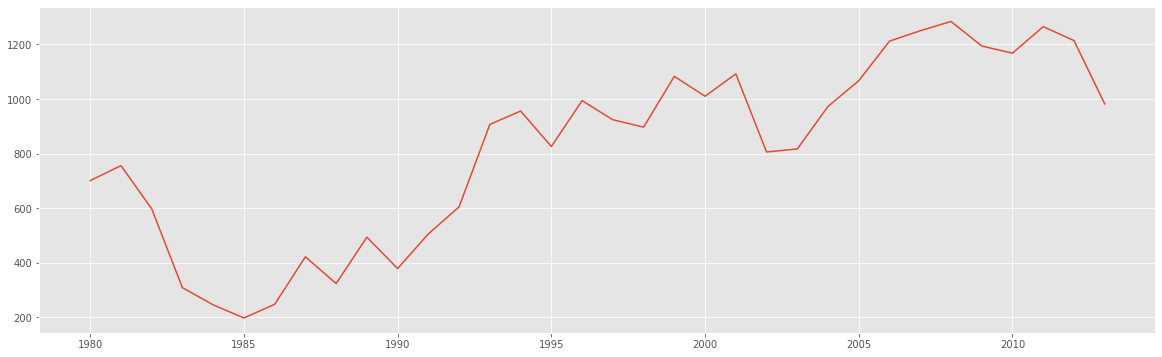

In [16]:
df.loc['Japan',years].plot(kind='line',figsize=(20,6))
plt.show()

# add pandas styling

In [17]:
continent_df=df.groupby('continent')[years].sum()

In [18]:
continent_df.style.background_gradient(cmap='Pastel1_r')#darkblue

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


In [19]:
continent_df.style.bar(color='darkblue')

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


In [20]:
continent_df.style.text_gradient(cmap='rainbow')

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775



 - Visualization

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# basic graphs- matplotlib
1. line plot
2. var plot
3. pie chart
4. scatter plot
5. histogram
6. area
7. box plot
## advanced graphs- Seaborn
1. catplot
2. jointplot
3. pairplot
4. heatmap
5. violinplot
6. count plot
### interactive graphs- plotly
1. graphs similar to matplotlib but interactive

In [39]:
df.plot?

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x12F72850>
File:           c:\users\shalini shukla\miniconda3\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plo

<AxesSubplot: >

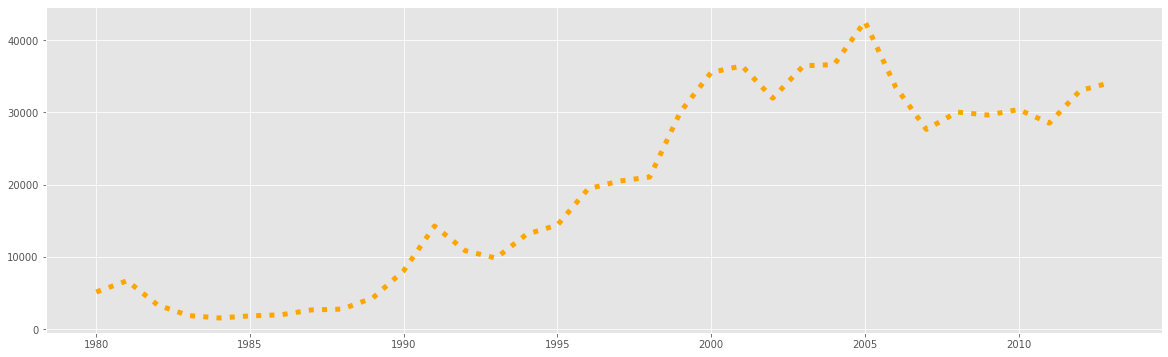

In [41]:
df.loc['China',years].plot(kind='line',figsize=(20,6),linewidth=5,linestyle=':',color='orange')

In [43]:
df.index

Index(['India', 'China',
       'United Kingdom of Great Britain and Northern Ireland', 'Philippines',
       'Pakistan', 'United States of America', 'Iran (Islamic Republic of)',
       'Sri Lanka', 'Republic of Korea', 'Poland',
       ...
       'Kiribati', 'Vanuatu', 'Sao Tome and Principe', 'Tuvalu',
       'American Samoa', 'San Marino', 'New Caledonia', 'Marshall Islands',
       'Western Sahara', 'Palau'],
      dtype='object', name='country', length=195)

<AxesSubplot: >

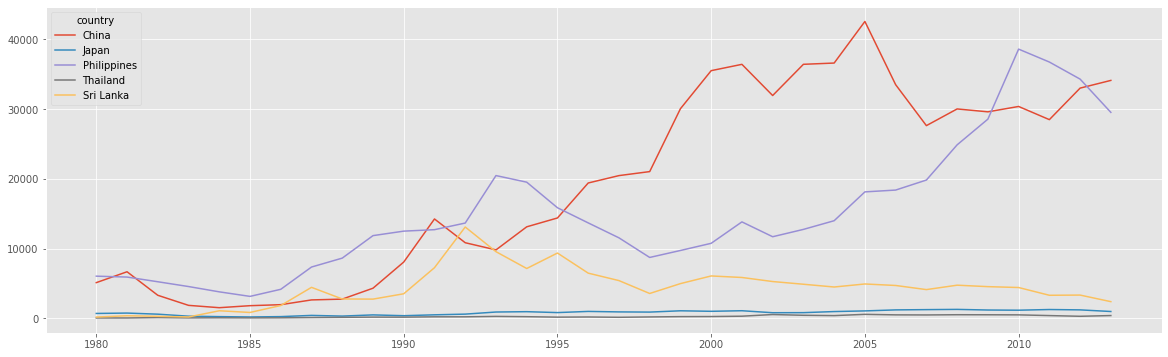

In [45]:
country_list=['China','Japan','Philippines','Thailand','Sri Lanka']
df.loc[country_list,years].T.plot(figsize=(20,6))

<AxesSubplot: >

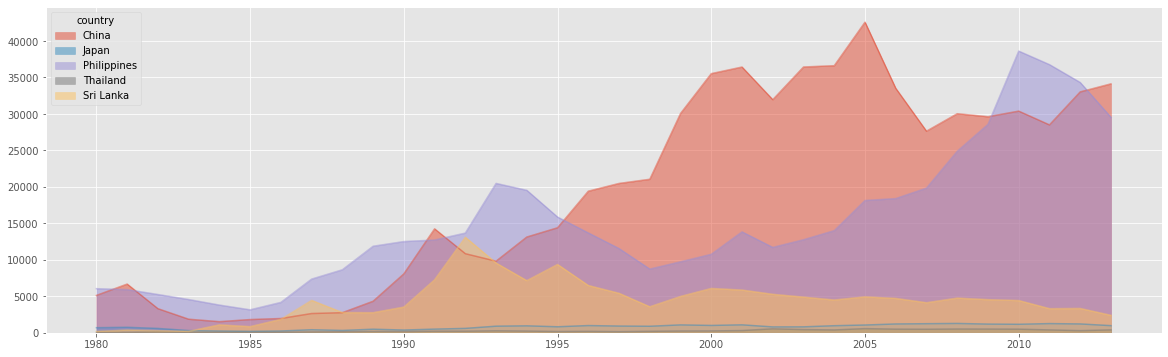

In [51]:
df.loc[country_list,years].T.plot(kind='area',figsize=(20,6),stacked=False,alpha=.5)
#country_list=['China','Japan','Philippines','Thailand','Sri Lanka']

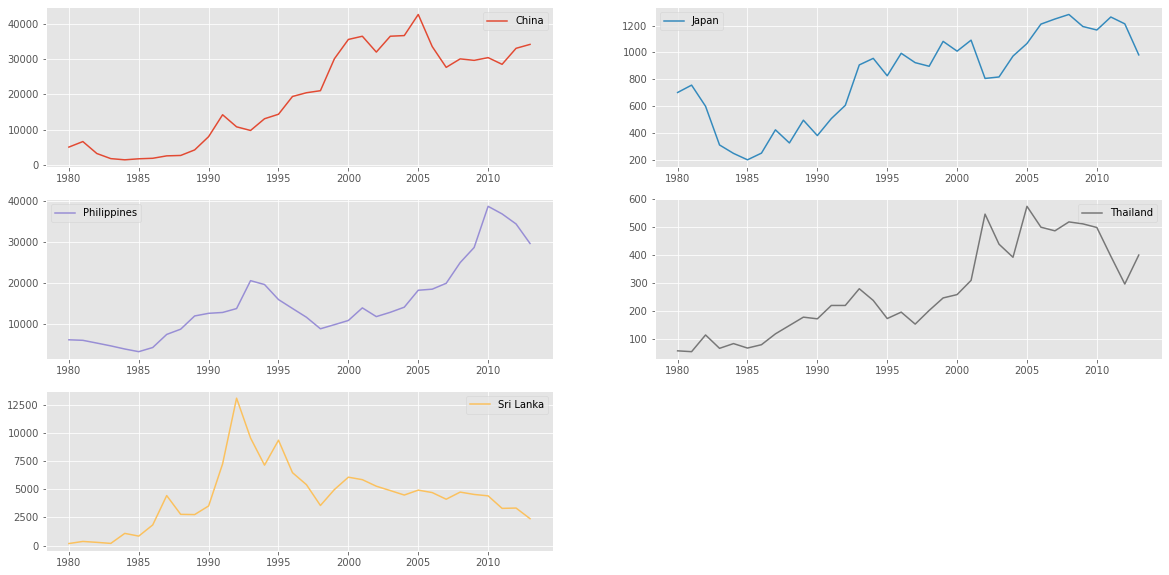

In [56]:
_ = df.loc[country_list,years].T.plot(figsize=(20,10),subplots=True,layout=(3,2),sharex=False)

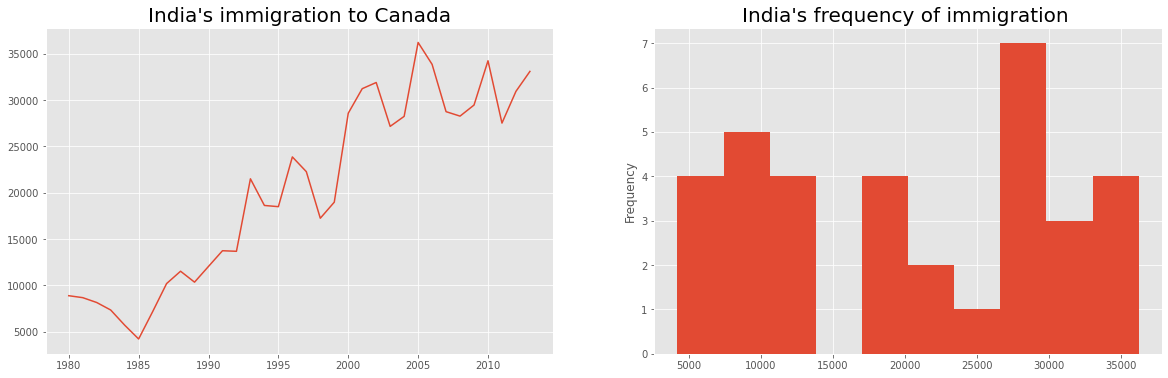

In [60]:
fig,ax=plt.subplots(figsize=(20,6),nrows=1,ncols=2,)
df.loc['India',years].plot(ax=ax[0])
df.loc['India',years].plot(ax=ax[1],kind='hist')
ax[0].set_title("India's immigration to Canada",fontsize=20)
ax[1].set_title("India's frequency of immigration ",fontsize=20)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

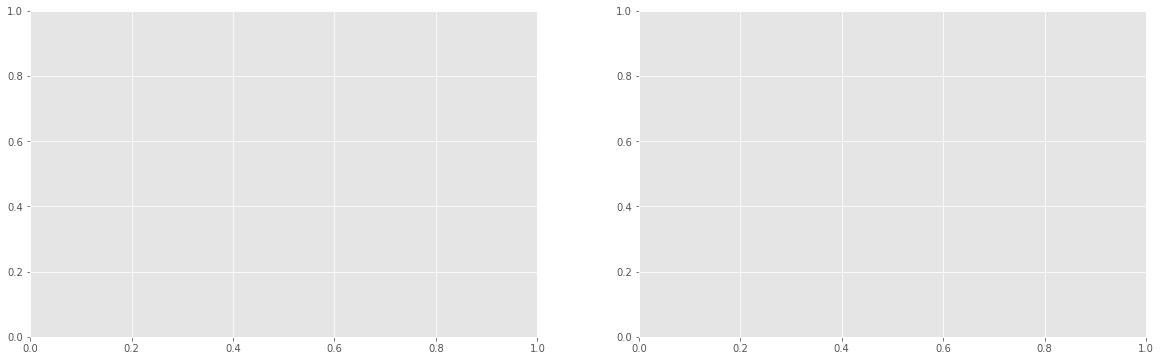

In [61]:
fig,ax=plt.subplots(figsize=(20,6),nrows=1,ncols=2,)
df.loc['India',years].plot(ax=ax[0,0])
df.loc['India',years].plot(ax=ax[0,1],kind='hist')
df.loc['China',years].plot(ax=ax[1,0])
df.loc['China',years].plot(ax=ax[1,1],kind='hist')
ax[0,0].set_title("India's immigration to Canada",fontsize=20)
ax[0,1].set_title("India's frequency of immigration ",fontsize=20)
ax[1,0].set_title("Canada's immigration to India",fontsize=20)
ax[1,1].set_title("Canada's frequency of immigration ",fontsize=20)
plt.show()

<AxesSubplot: >

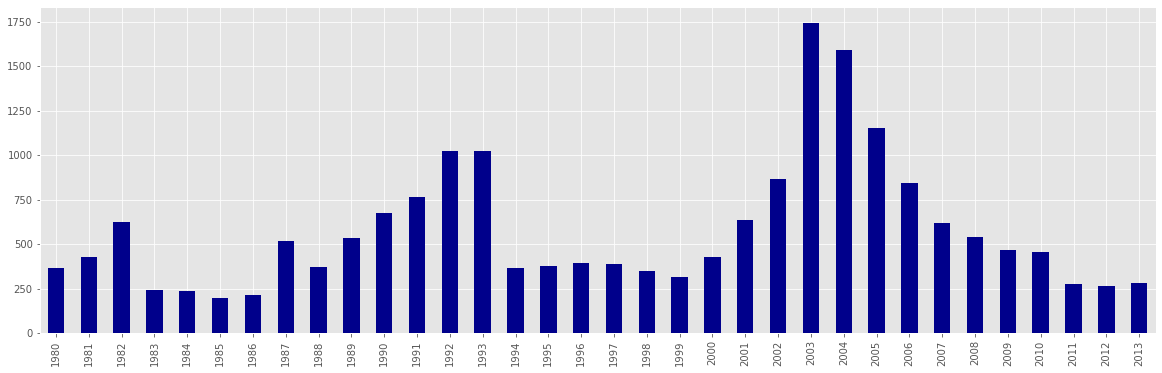

In [62]:
df.loc['Argentina',years].plot(kind='bar',figsize=(20,6),color='darkblue')

<AxesSubplot: >

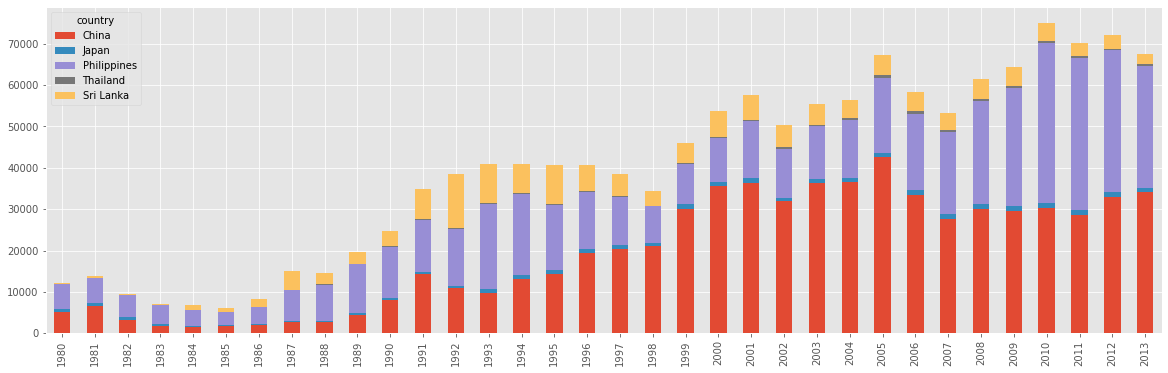

In [64]:
df.loc[country_list,years].T.plot(kind='bar',figsize=(20,6),stacked=True)

<AxesSubplot: ylabel='total'>

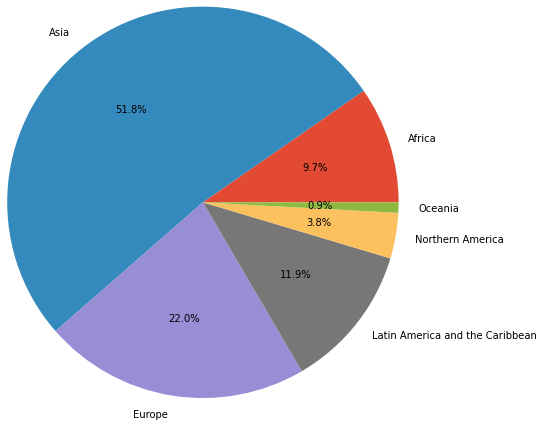

In [66]:
plt.figure(facecolor='white')
continent_df['total']=continec=continent_df.sum(axis=1)
continent_df['total'].plot(kind='pie',figsize=(20,6),autopct='%1.1f%%',radius=1.5)

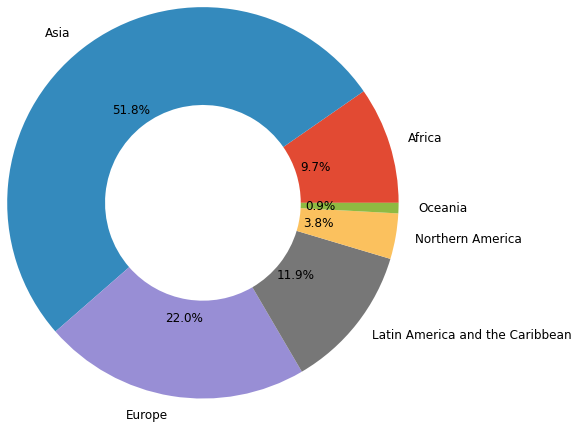

In [70]:
plt.figure(facecolor='white')
continent_df['total']=continec=continent_df.sum(axis=1)
continent_df['total'].plot(kind='pie',figsize=(20,6),autopct='%1.1f%%',
        radius=1.5,fontsize=12,wedgeprops={'width':0.75})
plt.ylabel('')        
plt.savefig('continet_wise_immigration_pie_chart.png',dpi=300,bbox_inches='tight')

<AxesSubplot: >

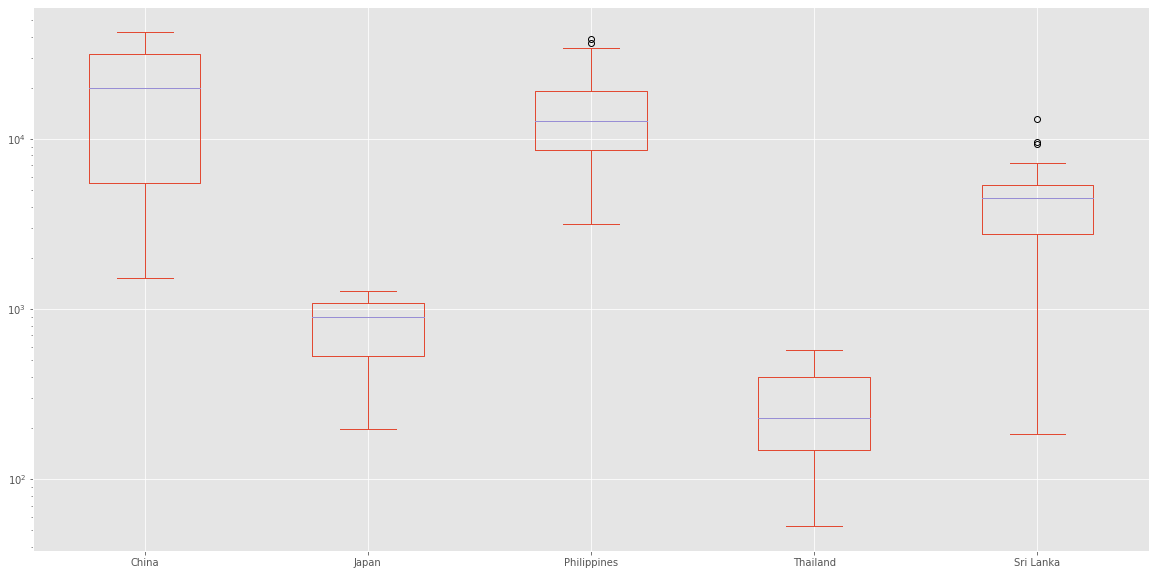

In [71]:
df.loc[country_list,years].T.plot(kind='box',figsize=(20,10),logy=True)

In [72]:
years=list(range(1980,2014))
india_data=df.loc['India',years]
px.line(india_data,x=india_data.index,y=india_data.values,markers=True,height=300)


In [74]:
countrydf=df.loc[country_list,years].T

In [75]:
px.funnel(countrydf,countrydf.index,countrydf.columns)

- visualisation on map

In [81]:
px.choropleth(df,locations=df.index,locationmode='country names',color='total',height=600)

In [83]:
import folium

In [84]:
folium.Map(location=[26.8467,80.9462],zoom_start=14,height=400)

In [85]:
lko=folium.Map(location=[26.8467,80.9462],zoom_start=14,height=400)
m1=folium.Marker([26.8467,80.9462],popup='Lucknow CENTER', tooltip='click to see')
m1.add_to(lko)
lko